# Diabetes

Vamos a explorar el conjunto de datos de diabates existente en la librería Scikit-learn para ver si podemos hacer un modelo que prediga esta condición.

Emplearemos la función `load_diabetes()` ([documentación](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [25]:
import numpy as np
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Veamos que contiene.

In [2]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

De aquí podermos obtener el contexto informativo de:

1. ¿Qué variables hay? ¿Qué significan?

1. ¿Cual es la relación entre `diabetes['data']` y `diabetes['target']`?

1. ¿Cuantos registros hay disponibles?

In [3]:
import pandas as pd

df = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])
df['target'] = diabetes['target']
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [5]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


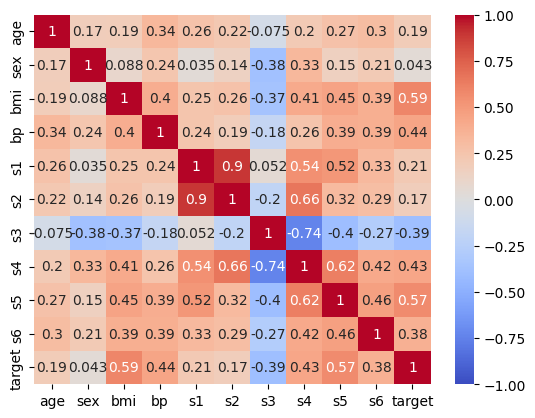

In [6]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm");

Deberemos comprobar si la distribución objetivo corresponde a una distribución normal...

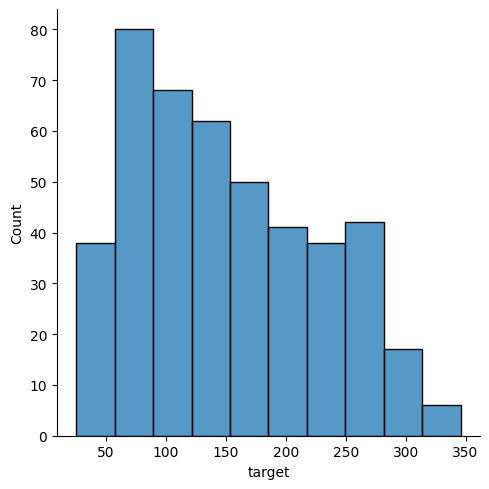

In [7]:
sns.displot(df['target']);

In [8]:
from scipy import stats

res = stats.normaltest(df['target'])
res

NormaltestResult(statistic=np.float64(64.15092254678288), pvalue=np.float64(1.1743678801847827e-14))

El test se establece con la hipótesis nula de que los datos provienen de una distribución normal.

Dado que el p-valor es muy pequeño, representando la probabilidad de que estas muestras correspondan a una distribución normal del fenómeno observado, parece ser que nuestra distribución objetivo no tiene base suficiente para asumir la normalidad necesaria para albergar una regresión lineal como modelo.

Veamos qué sucede :)

In [15]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:10]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [16]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (442, 9)
Train features shape: (309, 9)
Train target shape: (309,)
Test features shape: (133, 9)
Test target shape: (133,)


In [17]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [19]:
print(lm.intercept_)
print(lm.coef_)

151.0141439205211
[-258.42787253  546.8557391   393.45827561 -909.87618965  517.28592013
  127.33219445  285.62541613  667.85866424   44.49848515]


In [18]:
X_test

,sex,bmi,bp,s1,s2,s3,s4,s5,s6
287,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032432,-0.005220
211,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022517,-0.021788
72,0.050680,-0.004050,-0.012556,0.103003,0.048790,0.056003,-0.002592,0.084492,-0.017646
321,-0.044642,0.051996,0.079265,0.054845,0.036577,-0.076536,0.141322,0.098648,0.061054
73,0.050680,-0.020218,-0.002228,0.038334,0.053174,-0.006584,0.034309,-0.005142,-0.009362
...,...,...,...,...,...,...,...,...,...
238,0.050680,-0.009439,0.059744,-0.035968,-0.007577,-0.076536,0.071210,0.011011,-0.021788
26,-0.044642,-0.077342,-0.026328,-0.089630,-0.096198,0.026550,-0.076395,-0.042571,-0.005220
7,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064
401,-0.044642,-0.045007,-0.057313,-0.034592,-0.053923,0.074412,-0.076395,-0.042571,0.040343


In [28]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente R²: {r2:.2f}")

Error cuadrático medio (MSE): 2807.22
Coeficiente R²: 0.48


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['bmi'], df['target'], color='blue', label='Datos reales')
X_sorted = np.sort(df['bmi'].values).reshape(-1, 1)
y_pred_line = lm.predict(X_sorted)  

plt.plot(X_sorted, y_pred_line, color='red', linewidth=2, label='Línea de predicción')

plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('Regresión lineal: BMI vs Target')
plt.legend()
plt.show()
`


In [20]:
predictions = lm.predict(X_test)
predictions

array([137.54430976, 178.24428309, 124.31344596, 290.41046449,
       123.72193263,  91.83764772, 258.1669169 , 179.57772175,
        87.58819097, 111.06871337,  95.5665534 , 165.2790995 ,
        59.0291911 , 206.45980306,  98.40320274, 131.84628619,
       213.90161367, 251.47600846, 200.55700824, 218.7976029 ,
       205.15204314,  86.10121142,  71.41431127, 185.92213577,
       157.32613974, 161.71356061, 191.24672365, 183.64397875,
        47.63058234, 108.11064877, 176.76888424,  93.68807008,
       127.71877572, 183.58620669, 169.25968411, 192.83419158,
       122.21508287, 118.11209823, 144.27056767,  57.20368949,
        72.38945782, 105.86760923, 164.76457505, 150.05896078,
       164.53103759,  62.92701631,  75.4363806 , 109.14995073,
        54.21400792, 166.36326989, 151.60616607,  65.76448836,
       109.6049448 , 107.56837891, 182.1789435 , 158.91322416,
        95.51693581, 208.73082271, 118.80230209,  70.47665251,
       189.91623746, 205.90069242, 141.84887123, 105.99

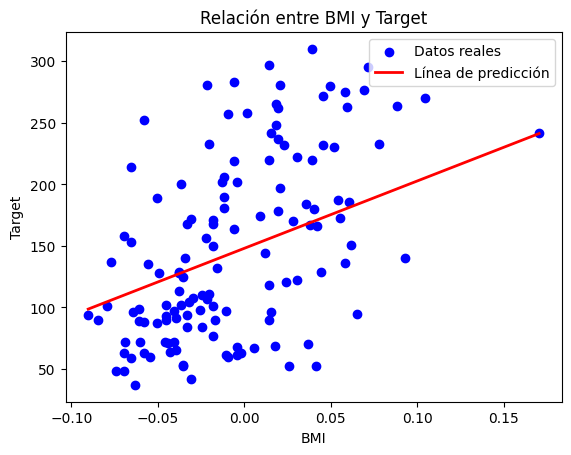

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(X_test['bmi'], y_test, color='blue', label='Datos reales')
bmi_sorted = np.linspace(X_test['bmi'].min(), X_test['bmi'].max(), 100).reshape(-1, 1)

X_ref = X_test.mean().to_frame().T  
X_plot = pd.concat([X_ref]*100, ignore_index=True)  
X_plot['bmi'] = bmi_sorted.flatten()  

y_pred_line = lm.predict(X_plot)

plt.plot(bmi_sorted, y_pred_line, color='red', linewidth=2, label='Línea de predicción')
plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('Relación entre BMI y Target')
plt.legend()
plt.show()


In [26]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 41.87576841740109
MSE: 2807.2163528539445
RMSE: 52.98317046812077
